: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# pass column names and load each csv into each dataframe
user_cols=['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./ml-100k/u.user', sep='|', names=user_cols,encoding='UTF-8')
rating_cols=['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=rating_cols,encoding='UTF-8')
movie_cols=['movie_id', 'title', 'release_date']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=movie_cols, usecols=range(3),encoding='latin-1')

In [3]:
print(users.head(5))

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213


In [4]:
print(ratings.head(5))

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


In [5]:
print(movies.head(5))

   movie_id              title release_date
0         1   Toy Story (1995)  01-Jan-1995
1         2   GoldenEye (1995)  01-Jan-1995
2         3  Four Rooms (1995)  01-Jan-1995
3         4  Get Shorty (1995)  01-Jan-1995
4         5     Copycat (1995)  01-Jan-1995


In [6]:
# creating the merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)
print(lens.head(3))

   movie_id              title release_date  user_id  rating  unix_timestamp  \
0         1   Toy Story (1995)  01-Jan-1995      308       4       887736532   
1         4  Get Shorty (1995)  01-Jan-1995      308       5       887737890   
2         5     Copycat (1995)  01-Jan-1995      308       4       887739608   

   age sex occupation zip_code  
0   60   M    retired    95076  
1   60   M    retired    95076  
2   60   M    retired    95076  


In [7]:
#creating the list of movies with the highest amount
# of ratings with a length of 10
most_rated=lens.title.value_counts()[:10]
print(most_rated)

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64


In [8]:
# creating a new dataframe for movie stats
# contains the movie title, no. of ratings and mean rating
movie_stats=lens.groupby('title').agg({'rating':[np.size,np.mean]})
print(movie_stats.head(5))

                          rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390


In [9]:
# sort by average
top_rated=movie_stats['rating']['size']>300

top_n_top_rated=movie_stats[top_rated].sort_values([('rating', 'mean')], ascending=False)[:10]
print(top_n_top_rated)



                                       rating          
                                         size      mean
title                                                  
Star Wars (1977)                          583  4.358491
Silence of the Lambs, The (1991)          390  4.289744
Godfather, The (1972)                     413  4.283293
Raiders of the Lost Ark (1981)            420  4.252381
Titanic (1997)                            350  4.245714
Empire Strikes Back, The (1980)           367  4.204360
Princess Bride, The (1987)                324  4.172840
Fargo (1996)                              508  4.155512
Monty Python and the Holy Grail (1974)    316  4.066456
Pulp Fiction (1994)                       394  4.060914


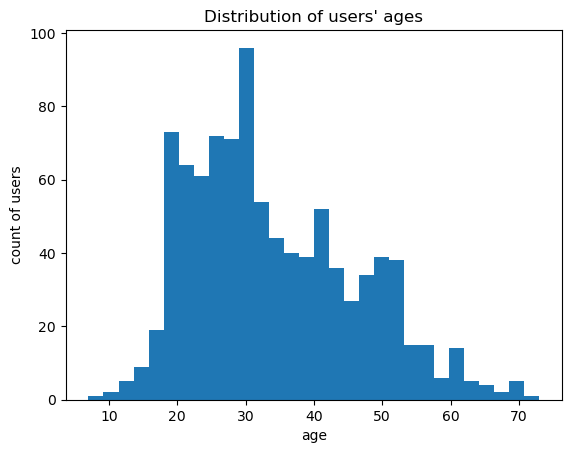

In [10]:
# plots to show distribution of age groups in the datset
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');
plt.savefig("./userages")

In [11]:
# create a table pof the age group, frequency and mean rating
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

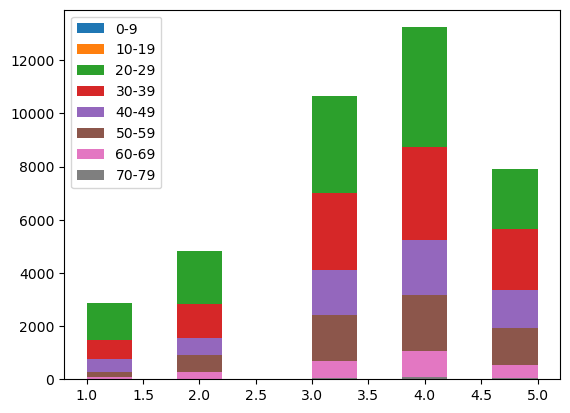

In [12]:
#Create histogram to show disribution of ratings in each age group

# Group the data by age
grouped = lens.groupby("age_group")

# Plot the distribution of ratings for each age group
fig, ax = plt.subplots()
for name, group in grouped:
    ax.hist(group["rating"], label=name)

# Add a legend
ax.legend()

# Show the plot
plt.savefig("./ratingspergroup.png", format='png')
plt.show()


In [13]:
import random

#get num of filsm for max random no
numOfFilms=len(movies)

#init list of films
random_films=[]
#loop n times to create a top-n list of films (n=10)
for i in range(0,10):
    #get random int in range of film ids and find movie
    index=random.randint(1, numOfFilms)
    random_films.append(movies.loc[index].title)

print("Random 10 Model\n-----------------")

print("\n".join(random_films))

Random 10 Model
-----------------
Craft, The (1996)
8 1/2 (1963)
Flirting With Disaster (1996)
Chairman of the Board (1998)
Aparajito (1956)
Blade Runner (1982)
Father of the Bride Part II (1995)
Month by the Lake, A (1995)
Nothing to Lose (1994)
Intimate Relations (1996)


In [14]:
from surprise import NormalPredictor
#personalised verison of this
from collections import defaultdict

from surprise import Dataset, NormalPredictor


def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n






In [15]:
from surprise import Dataset, NormalPredictor, accuracy
data = Dataset.load_builtin("ml-100k")
trainset = data.build_full_trainset()
algo = NormalPredictor()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))






RMSE: 1.0217
1.0216547963980525
MAE:  0.8428
0.8428325826224987


In [ ]:
#print(len(top_n.get('1')))

print(get_top_n(predictions,1))





In [40]:
# a dictionary in the format (KEY=userID, VALUE= [movieID, predict rating])
top_rated_10= get_top_n(predictions, 10)
#to get to a list of values and ratings we can use .get
#but it requires userid to be in string format
print(top_rated_10.get('398'))


[('265', 5), ('257', 5), ('768', 5), ('98', 5), ('304', 5), ('1137', 5), ('241', 5), ('143', 5), ('526', 5), ('919', 5)]


In [59]:
userList=top_rated_10.get('5')
print(userList)

[('785', 5), ('1042', 5), ('1081', 5), ('796', 5), ('232', 5), ('15', 5), ('1444', 5), ('480', 5), ('328', 5), ('195', 5)]


In [98]:
# Extract the first value from each tuple using list comprehension
raw_item_ids = [t[0] for t in userList]

# Print the result
#TODO needs to conver to a np array for some fucking reason idek
raw_item_ids

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [97]:
# Get the movie titles corresponding to the item IDs in the list
movie_names = movies.loc[movies['movie_id'].isin(arr), 'title'].tolist()

# Print the resulting movie names
print(movie_names)


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

['Only You (1994)', 'Just Cause (1995)', 'Curdled (1996)']
